## CCT College Dublin

### Assessment Cover Page


Module Title:Machine Learning for AI

Assessment Title:	ML_CA2

Lecturer Name: David McQuaid

Student Full Name: Robert Szlufik

Student Number: 2020358

Assessment Due Date: 31st May 2024

Date of Submission: 29th May 2024


Importing packages 

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from keras import Sequential
from keras.layers import Dense 
from sklearn.model_selection import GridSearchCV

from tensorflow import keras
from tensorflow.keras import layers
import keras.optimizers 

from textblob import TextBlob
import re 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

## Part I

Importing dataset

In [2]:
df = pd.read_csv("BankRecords.csv")

### EDA

In [3]:
df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [4]:
df.describe()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [6]:
df.isna().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

Unique values in Education column

In [7]:
df["Education"].unique()

array(['Diploma', 'Degree', 'Masters'], dtype=object)

Distribution of each column 

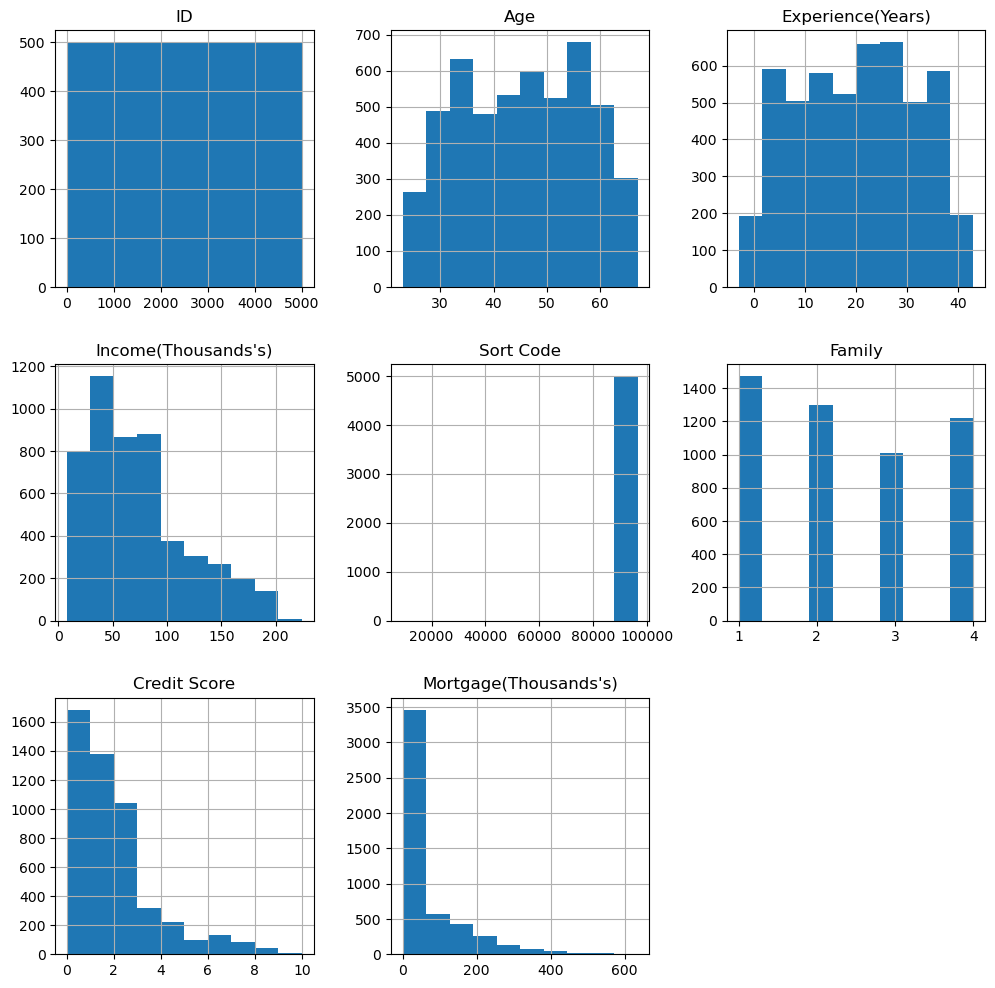

In [8]:
df.hist(figsize=(12,12))
plt.show()

From the graph above, we can determine that Credit Score, Sort Code, Mortgage and Income columns are left-skewed, the rest of the columns, except of ID, follow more Gaussian distribution. 

The following graph shows distribution of Education column across the dataset. We can observe that Diploma column contain close to 600 more records that the other two. 

<Axes: xlabel='Education', ylabel='count'>

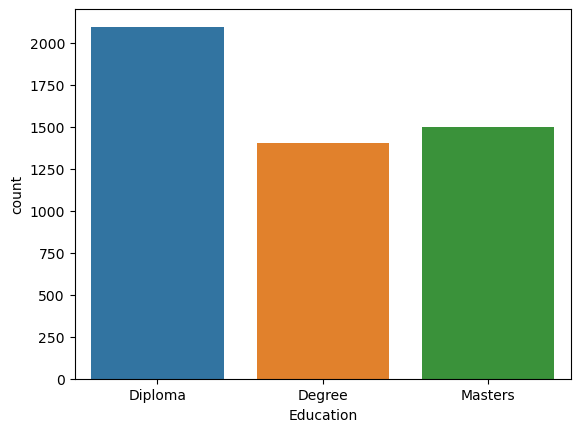

In [9]:
sns.countplot(data=df, x='Education')


Following graph, box plot of Experience, shows us minimum and maximum values in this columns, as well as that distribution between 25 th and 75th percentile ips concluded between 10 and 30 years of experience. With mean of this column falling at 20 years.

<Axes: ylabel='Experience(Years)'>

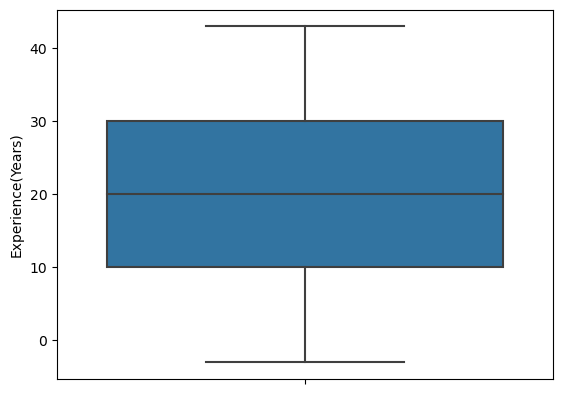

In [10]:
sns.boxplot(data=df, y='Experience(Years)')

The next graph shows the distribution of Income in respect to Education. We can see that Degree and Masters columns contain outliers in significant numbers, therefore, I would advocate for not removing them, since they might hold a pattern.  

<Axes: xlabel='Education', ylabel="Income(Thousands's)">

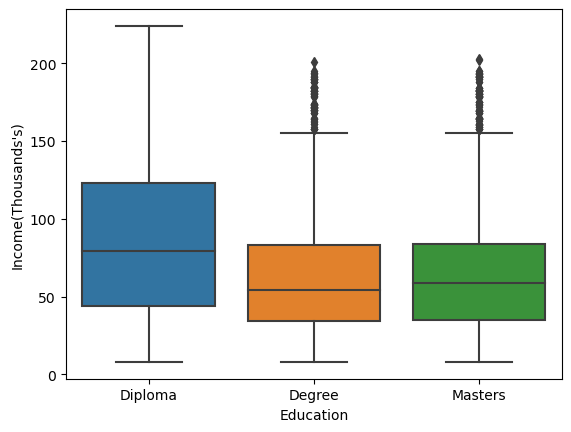

In [11]:
sns.boxplot(data=df, x='Education', y="Income(Thousands's)")

The following graph shows pair plots between selected columns. We can observe that there is a strong correlation between Age and Experience, which is a logical conclusion, since usually the older you are the more experience you have. Additionally, We can see that there is a correlation between credit score and Income. 


c:\Users\rober\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


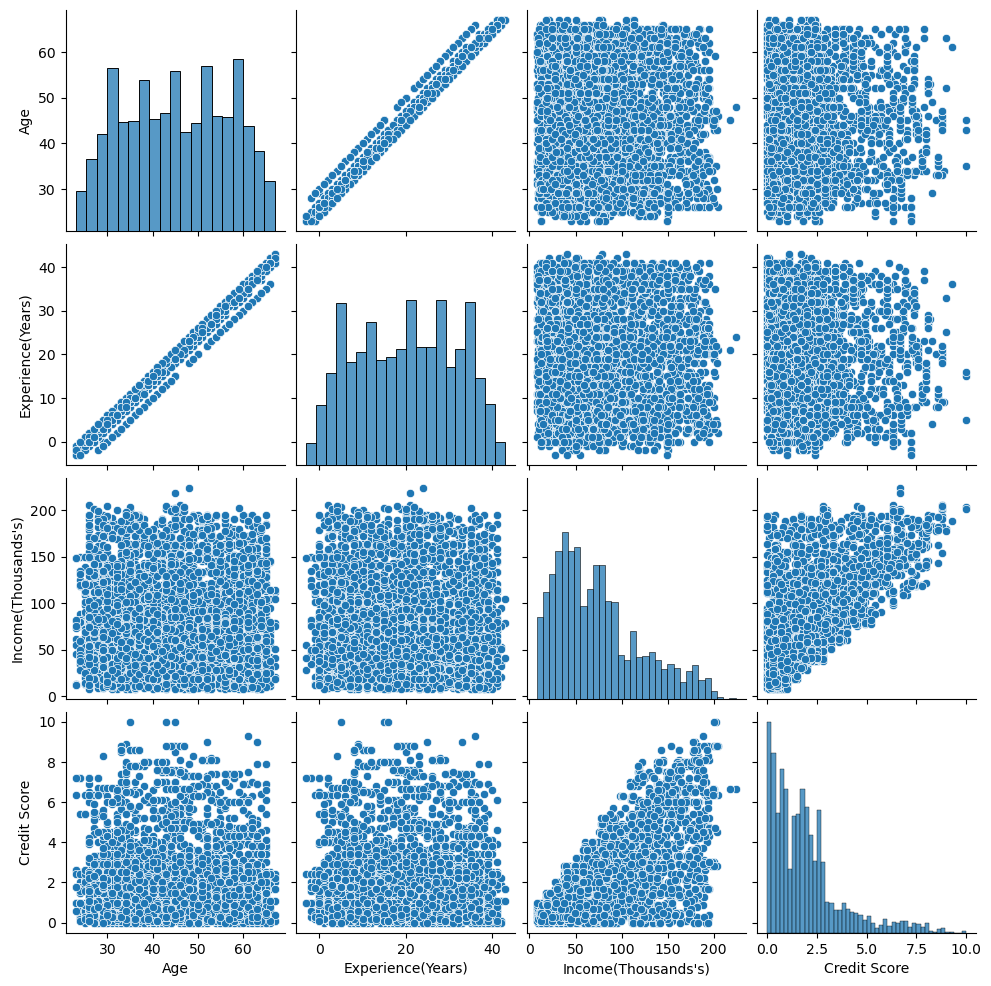

In [12]:
sns.pairplot(df[["Age", "Experience(Years)","Income(Thousands's)", "Credit Score"]])

The next graph shows Experience distribution across the dataset.

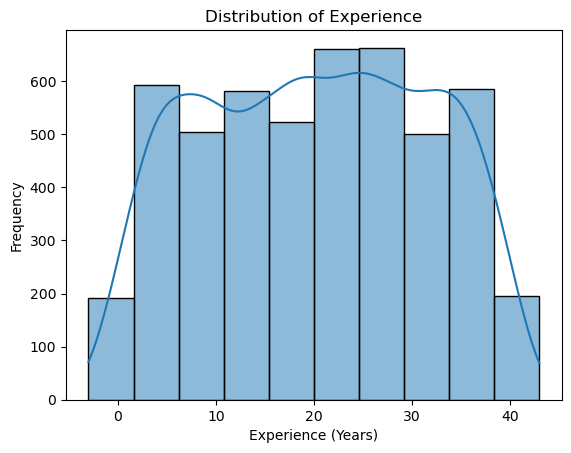

In [13]:
sns.histplot(data=df, x='Experience(Years)', bins=10, kde=True)

plt.xlabel('Experience (Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Experience')
plt.show()


Next graph shows distribution of Family size in the dataset.

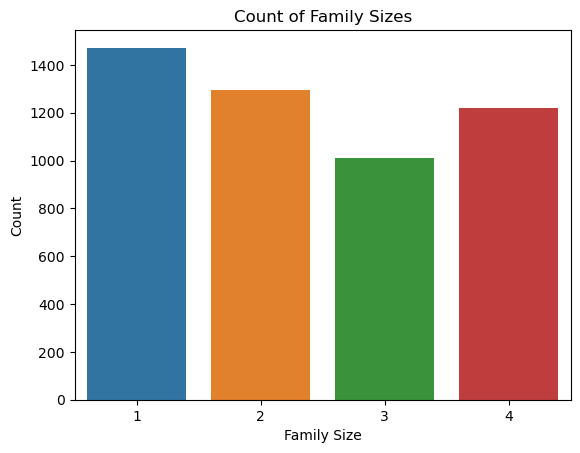

In [14]:
sns.countplot(data=df, x="Family")
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Count of Family Sizes')
plt.show()


From the Experience distribution graph we can observe that values start below 0. 

The graph in the next cell shows line chart of average Experience by Age

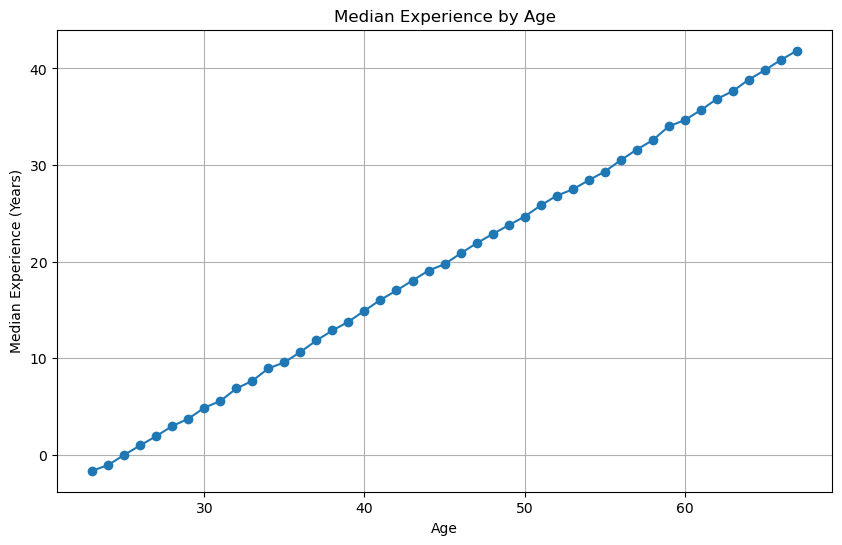

In [15]:
mean_exp_by_age = df.groupby("Age")["Experience(Years)"].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_exp_by_age.index, mean_exp_by_age.values, marker='o', linestyle='-')
plt.title('Median Experience by Age')
plt.xlabel('Age')
plt.ylabel('Median Experience (Years)')
plt.grid(True)
plt.show()

We could assume that this is bad data and remove it, however, there might be a pattern in it. For example, there are no negative values for the Experience column in Age groups above 30, which indicates to me that this is not just an error, this could potentially be a scaling issue, or some particular way that this data was encoded. Perhaps, there is a purpose behind representing it as a negative value. I decide to keep all the records and scale them to that they are represented as positive numbers. 

The code in the following cell filter dataframe for values in Experience columns where value is negative, then it groups and prints filtered dataframe by Age value.


In [16]:
filtered_df = df[(df["Experience(Years)"] <= 0) & (df["Income(Thousands's)"] > 0)]
age_group_counts = filtered_df.groupby("Age").size()

print("Number of records for each age group where experience is smaller than 0:")
print(age_group_counts)

Number of records for each age group where experience is smaller than 0:
Age
23    12
24    28
25    35
26    29
27     8
28     1
29     4
30     1
dtype: int64


The following cell displays total number of records grouped by Age, where Age is below 30. This is due to the fact that there are no negative values for Experience column above 30 years old.  

In [17]:
age_group_counts = df[df["Age"] <= 30].groupby("Age").size()

print("Number of records for each age group:")
print(age_group_counts)

Number of records for each age group:
Age
23     12
24     28
25     53
26     78
27     91
28    103
29    123
30    136
dtype: int64


### Conclusions to EDA

In conclusion, we can observe that there are several columns that are left-skewed and several that are categorical. In the next part, we will first encode categorical columns and then scale the rest of the columns. This will ensure that all values are positive and that distribution is closer to Gaussian.

### Data Manipulation

Encoding Education column

In [18]:
education_encoder = {
  "Diploma" : 1,
  "Degree" : 2,
  "Masters" : 3
}

df["Education"] = df["Education"].map(education_encoder)

Encoding Yes/No columns. 

We can simply change Yes for 1 and No for 0 in all of the Yes/No columns in the dataset.

In [19]:
binary_columns = ["Personal Loan", "Securities Account", "CD Account", "Online Banking", "CreditCard"]

df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})

Drop ID column 

In [20]:
df = df.drop(columns="ID")

Selecting columns to be scaled

All numerical columns, except those that were encoded will be scaled. 

In [21]:
column_to_scale = ["Age","Experience(Years)","Income(Thousands's)","Credit Score","Mortgage(Thousands's)","Sort Code"]

Assigning independent and target variables. For independent variables, I will use all but the target variable. 

Scaling numerical columns

Then, dataset gets split into training and testing sets.

In [22]:
scaler = MinMaxScaler()

df[column_to_scale] = scaler.fit_transform(df[column_to_scale])

In [23]:
independent_variables = df.drop(columns="Income(Thousands's)").columns
dependent_variable = df["Income(Thousands's)"]

independent_variables = df[column_to_scale]

X = df.drop(columns="Income(Thousands's)")

y = dependent_variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Model Selection

In the next step I performed a Grid Search over a few regression algorithms in order to select the best performing one. This is a very quick way to find out which algorithm is the best suited for this particular dataset. 

In [24]:
models = {
    'Support Vector Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"{name}: Mean Squared Error = {mse}")

Support Vector Regressor: Mean Squared Error = 0.017407403632503354
Decision Tree Regressor: Mean Squared Error = 0.016896364883401918
Random Forest Regressor: Mean Squared Error = 0.008527874356155693
Gradient Boosting Regressor: Mean Squared Error = 0.01443230768067252
Linear Regression: Mean Squared Error = 0.020243500218211592


As we can see from the output cell, Random Forest Regressor has performed the best, achieving the lowest MSE (Mean Square Error) score. I selected this algorithm for further analysis. 

Random Forest algorithm, is an extension of Decision Tree algorithm that combines bagging and random feature selection.  It generates a random subset of features but, just like a decision tree, however it examines all possible splits. Essentially, a random forest is a collection of decision trees. Benefits include reduced risk of overfitting, flexibility and easily defined feature importance. However, it might be time consuming, requires more resources and can be more complex. (IBM, 2023)

In the following cell, I performed Grid Search in order to optimise hyperparameters for the algorithm. 

param_grid dictionary contains hyperparameters that will be tested during Grid Search. 

In [25]:
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20],      
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]      
}

rf = RandomForestRegressor()


grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Best Random Forest Regressor - Mean Squared Error:", mse)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Regressor - Mean Squared Error: 0.008498655493879582


Training final model with the best parameters found in the grid search and obtaining final MSE score. 

In [26]:
model_rf = RandomForestRegressor(**best_params)

model_rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200)

Validating Testing Set For Random Forest 

In [27]:
y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Regressor - MSE:", mse)

Random Forest Regressor - MSE: 0.008527811416594864


Validating Training Set For Random Forest

In [28]:
y_pred_train = model_rf.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("Random Forest Regressor over training set - MSE:", mse_train)

Random Forest Regressor over training set - MSE: 0.00127343634392468


As we can see, the MSE score for the testing set is 0.08 and 0.01 for the training set. This could mean that the model is over fit, however, this is the best score I achieved. Changing ratios between testing and training split size decreased model performance. 

### Neural Network

Input layers - Input layers is the interface at which data is passed into the model. Our input data has 12 features, therefore we define 12 input nodes, one for each feature. 

Hidden layers - according to Kirk (2017, pp.131–146), there are certain heuristics that help to determine the number of hidden layers, no more than 2 hidden layers, one layer if mapping in continuous. I achieved the best MSE score with 2 hidden layers. 

Neurons - according to Kirk (2017, pp.131–146), the heuristics for number of neurons in hidden layers are that the number should be between number of inputs and output, should be ⅔ of size of an input layer and should be less than input number times 2. Therefore, in our case, the input layer  has 12 neurons, ⅔ of 12 is 8 and that is the number of neurons in the hidden layer. I tried to distribute it across 2 hidden layers equally, but found that assigning 6-2 distribution worked the best. However, it is important to note that the differences between runs have not been significant, averaging around 0.002 difference in MSE score. 


Output layer - Since this is a regression problem, we define an output layer with a single node with linear activation function. We expect only one value to be returned from the model. 


Activation function - ReLu (rectified linear unit) is, according to Kilicarslan, Adem and Çelik (2021), one of the most popular activation functions in Machine Learning, ReLu is a non-linear activation function that benefits small computation load and is one of the most popular in machine learning. It, however, introduces a problem when values are negative. 
Fortunately after scaling, all values in training and testing sets are positive, therefore, it is safe to use this activation function. I defined this function to be used across neural  networks. As mentioned before, ReLu does not work  with negative values, and some of the functions produce negative output, therefore we cannot mix any other activation function before or after ReLu. 

I found ReLu to produce the best results, I have tried several other functions provided by keras package, such as ReLu6, Sigmoid, Linear, Tanh, Gelu, but they have all performed considerably worse than ReLu. 

The cell below creates and trains a Neural Network Regression model.<br>It creates 4 layers:
- 1 input layer with 12 nodes and ReLu activation function.
- 2 hidden layers, the first one with 6 neurons and the second one with 2, both with ReLu activation function.
- 1 output layer with linear function to produce prediction. 

Through the development process, I have tried many different parameters and optimised functions. As an optimisation function, in our case Adam, this one has performed the best. As for other hyperparameters, such as number of epochs, batch size and validation split, I found that they do not change the output a lot. However, the following set up produced the best results.


In [29]:
model_nn = keras.Sequential([
    layers.Dense(12, activation='relu'),
    layers.Dense(6, activation='relu'),
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation = 'linear'),
])


model_nn.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae','accuracy']) 



history = model_nn.fit(X_train, y_train, epochs=300, batch_size=75, validation_split=0.25)

Epoch 1/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0067 - loss: 0.0989 - mae: 0.2411 - val_accuracy: 0.0011 - val_loss: 0.0538 - val_mae: 0.1883
Epoch 2/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0053 - loss: 0.0604 - mae: 0.1931 - val_accuracy: 0.0011 - val_loss: 0.0429 - val_mae: 0.1667
Epoch 3/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0068 - loss: 0.0513 - mae: 0.1798 - val_accuracy: 0.0011 - val_loss: 0.0376 - val_mae: 0.1560
Epoch 4/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0042 - loss: 0.0435 - mae: 0.1646 - val_accuracy: 0.0011 - val_loss: 0.0328 - val_mae: 0.1462
Epoch 5/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0066 - loss: 0.0397 - mae: 0.1598 - val_accuracy: 0.0011 - val_loss: 0.0281 - val_mae: 0.1356
Epoch 6/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0049 - loss: 0.0328 - mae: 0.1457 - val_accuracy: 0.0011 - val_loss: 0.0243 - val_mae: 0.1268
Epoch 7/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

Validating Testings set for Neural Network 

In [52]:
y_pred = model_nn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MSE:  0.017166394004354078


Validating Training set for Neural Network

In [53]:
y_pred_train = model_nn.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE: ", mse)

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MSE:  0.01612963480196749


As we can see from 2 cells output above, final score for the Neural Network (NN) is 0.0171 MSE for the testing set and 0.0160 for training set. 
This is considerably worse than the Random Forest Regressor (RF), which scored 0.008 over testing set and 0.001 over training set. 

### Final Findings and Rationale 

The NN score is around 2 times larger than the score of Random Forest. Additionally, on my machine, it took 4 seconds to train DT algorithm and almost 90 seconds to train NN. 

The MSE score alone is a good reason to choose RF over NN, if we also consider training time the final choice is easy. 

The Random Forest Regressor would be my choice as a model to use for this problem. 

### Estimate For a New User 

Import Dataframe Again

In [32]:
df = pd.read_csv("./BankRecords.csv")

In the following cell, I define 3 users that do not exist in the dataset. 

The random seed will ensure that the random numbers generated will be consistent across runs.

I will use both models to predict for the set of 3 new users, then we can compare results. 

In [33]:
np.random.seed(42)

data = {
    "Age": [34,57,61], 
    "Experience(Years)":[10,37,40], 
    "Income(Thousands's) - Prediction NN" : [0,0,0], 
    "Income(Thousands's) - Prediction RF" : [0,0,0], 
    "Sort Code": [np.random.randint(9307, 96651) for _ in range(3)],
    "Family": [1,0,0],
    "Credit Score": [np.random.randint(0, 10) for _ in range(3)], 
    "Education": [3,2,3],
    "Mortgage(Thousands's)": [np.random.randint(0, 700) for _ in range(3)],
    "Personal Loan": [1,0,0], 
    "Securities Account": [0,0,0], 
    "CD Account": [0,0,0], 
    "Online Banking": [1,0,0],
    "CreditCard" : [1,1,1]
}


users = pd.DataFrame(data)
users

,Age,Experience(Years),Income(Thousands's) - Prediction NN,Income(Thousands's) - Prediction RF,Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,34,10,0,0,25102,1,6,3,214,1,0,0,1,1
1,57,37,0,0,10167,0,9,2,330,0,0,0,0,1
2,61,40,0,0,86127,0,2,3,458,0,0,0,0,1


Check if any of the records already exists in the original dataframe. If there is no output in the cell below, the records are not included in the original dataframe. 


In [34]:
for id, row in users.iterrows():
  check = df[df.eq(row).all(axis=1)]
  
  if not check.empty:
    print("Record already exists")

Remove irrelevant columns from columns_to_scale list

In [35]:
column_to_scale.remove("Income(Thousands's)")

Scale columns in users dataframe to make predictions.

In [36]:
users[column_to_scale] = scaler.fit_transform(users[column_to_scale])

Make predictions using both models.

In [37]:
predictions_nn = model_nn.predict(users.drop(columns=["Income(Thousands's) - Prediction NN","Income(Thousands's) - Prediction RF"]))

predictions_rf = model_rf.predict(users.drop(columns=["Income(Thousands's) - Prediction NN","Income(Thousands's) - Prediction RF"]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Instantiate MinMax Scaler to scale predicted income and fit the scaler with original data.

In [38]:
scaler_income = MinMaxScaler()
scaler_income.fit(pd.DataFrame(df["Income(Thousands\'s)"]))

MinMaxScaler()

Rescale predicted income.

In [39]:
rescaled_income_nn = scaler_income.inverse_transform(predictions_nn.reshape(-1,1))
rescaled_income_rf = scaler_income.inverse_transform(predictions_rf.reshape(-1,1))

Rescale the rest of the columns in user dataframe.

In [40]:
users[column_to_scale] = scaler.inverse_transform(users[column_to_scale])

Assign predicted incomes to the users columns.

In [41]:
users["Income(Thousands's) - Prediction NN"] = rescaled_income_nn
users["Income(Thousands's) - Prediction RF"] = rescaled_income_rf

Display user dataframe.

In [42]:
users.head()

,Age,Experience(Years),Income(Thousands's) - Prediction NN,Income(Thousands's) - Prediction RF,Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,34.0,10.0,140.760849,148.840,25102.0,1,6.0,3,214.0,1,0,0,1,1
1,57.0,37.0,107.767235,176.980,10167.0,0,9.0,2,330.0,0,0,0,0,1
2,61.0,40.0,39.731609,150.045,86127.0,0,2.0,3,458.0,0,0,0,0,1


As we can see in the output of the cell above. Predictions considerably different, at least for the second and the third customer. We could conclude that predictions made by RF algorithms are more accurate, we can examine, for example, that the experience and age of the 3rd users are both significant, and that their mortgage is very high. Of course, banks would probably not give such a high mortgage to a person with income estimated by NN, but estimation by RF is more plausible. 

In the end, I choose Random Forest to be the model I would use for this regression problem. It shows much better MSE scores, therefore, is much more reliable. 

## Part II

According to Pahwa, Taruna and Kasliwal (2018), preparation of text for sentiment analysis is a fundamental step in order to achieve adequate results. Comments on social media contain a lot of HTML tags, emojis and joining/stop words that do not contribute to sentiment score. 


The entire process, according to the authors of the article, consists of 4 steps: 

- Cleaning.
- Annotation - applying scheme to the text .
- Normalisation - mapping the term in  a scheme. 
- Analysis. 


Importing original dataset.

The data set was sourced from the Keggle website (Keggle, 2016). It included 5000 rows of comments in the political domain. 

In [59]:
original_df = pd.read_csv("./political_social_media.csv",encoding='ISO-8859-1')

In [60]:
original_df.describe()

,_unit_id,_trusted_judgments,audience:confidence,bias:confidence,message:confidence,orig__golden,audience_gold,bias_gold,message_gold
count,5.000000e+03,5000.00000,5000.000000,5000.000000,5000.000000,0.0,0.0,0.0,0.0
mean,7.661950e+08,1.03280,0.995253,0.993903,0.996215,NaN,NaN,NaN,NaN
std,1.444060e+03,0.18366,0.046920,0.053241,0.041798,NaN,NaN,NaN,NaN
min,7.661925e+08,1.00000,0.505500,0.502000,0.502000,NaN,NaN,NaN,NaN
25%,7.661937e+08,1.00000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
50%,7.661950e+08,1.00000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
75%,7.661962e+08,1.00000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
max,7.661975e+08,3.00000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN


In [61]:
original_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.0,neutral,1.0,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.0,neutral,1.0,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


As we can see. Dataframe has 21 columns. In our case, for the purpose of our analysis, the only columns we might be interested in are source and text

In [62]:
df = original_df[["source","text"]].copy()

Number of unique sources. 

In [63]:
df["source"].unique()

array(['twitter', 'facebook'], dtype=object)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  5000 non-null   object
 1   text    5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


Cleaning the data.

Removing punctuation, HTML tags, URLs, special characters and transforming text into lowercase. 

We can achieve all the cleaning processes in a function using regular expressions. Python (2009)

In [65]:
def clean_text(text):
    # match html
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # mach special characters
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # to lowercase
    text = text.lower().strip()
    return text


In [66]:
df['cleaned_text'] = df['text'].apply(clean_text)

Removing stop words. We will use sklearn module containing all english stop words. 

In [67]:
def remove_stop_words(text):
  cleaned = []
  for word in text.split():
    if word not in ENGLISH_STOP_WORDS:
      cleaned.append(word)
  new_text = " ".join(cleaned)
  return new_text

In [68]:
df['filtered_text'] = df['cleaned_text'].apply(remove_stop_words)

Verifying cleaning process.

In [69]:
df[['filtered_text',"cleaned_text","text"]].head(10)

,filtered_text,cleaned_text,text
0,rt nowthisnews rep trey radel r fl slams obama...,rt nowthisnews rep trey radel r fl slams obama...,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,video obamacare higher costs broken promises,video obamacare full of higher costs and bro...,VIDEO - #Obamacare: Full of Higher Costs and ...
2,join today remembering fallen heroes honoring ...,please join me today in remembering our fallen...,Please join me today in remembering our fallen...
3,rt senatorleahy st step senate debate leahycra...,rt senatorleahy st step toward senate debate o...,RT @SenatorLeahy: 1st step toward Senate debat...
4,amazon delivery drones need update law promote...,amazon delivery drones show need to update law...,.@amazon delivery #drones show need to update ...
5,called usdotfra release info inspections casse...,called on the usdotfra to release info about i...,Called on the @USDOTFRA to release info about ...
6,bbcworld help kidnapped nigerian school girls ...,bbcworld help us keep the kidnapped nigerian s...,"@BBCWorld, help us keep the kidnapped Nigerian..."
7,arizona pridechoose favorite s az picture face...,show your arizona pridechoose your favorite s ...,Show your Arizona pride-choose your favorite S...
8,wonderful night state senator ken yagers chili...,what a wonderful night at state senator ken ya...,What a wonderful night at State Senator Ken Ya...
9,great oped pres clinton signing fmla yrs ago t...,great oped by pres clinton about signing fmla ...,Great op-ed by Pres. Clinton about signing #FM...


Apply text blob to calculate sentiment score.

In [70]:
sentiment_score = df["filtered_text"].apply(lambda x:TextBlob(x).sentiment[0])

Including sentiment score in the dataframe.

In [71]:
df["sentiment_score"] = sentiment_score

Applying sentiment category based on sentiment score.

In [72]:
df["sentiment_score_text"] = df["sentiment_score"].apply(lambda x: "Positive" if  x > 0 else("Neutral" if x == 0 else "Negative"))

Displaying comment sentiment distribution in the dataset.

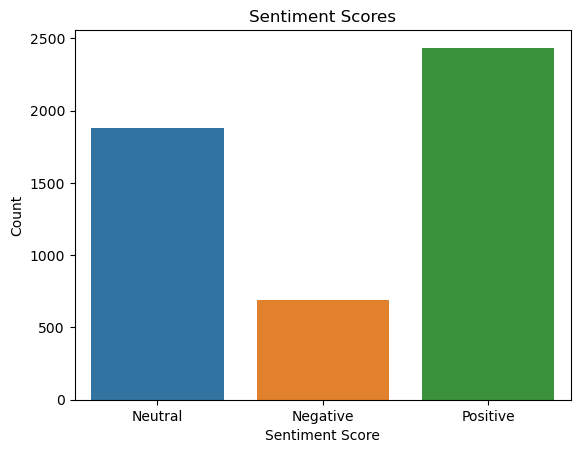

In [73]:
sns.countplot(x = "sentiment_score_text", data=df, )
plt.title("Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.show()

As we can see from the cell output above, almost half of the comments are positive, followed by neutral with the least comments being negative. This might be surprising, considering that the comments are of a political nature. 

Since this dataset contains 2 distinct sources, let us look at distribution of sentiment scorer with respect to the source. 

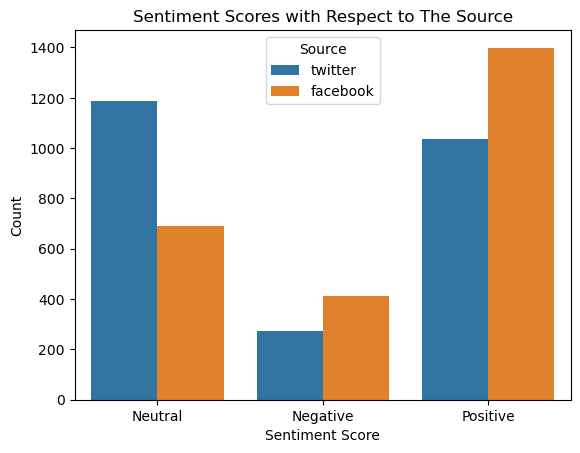

In [74]:
sns.countplot(x = "sentiment_score_text", hue="source",data=df, )
plt.title("Sentiment Scores with Respect to The Source")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.legend(title='Source')
plt.show()

We can observer that the biggest part of Twitter comments are neutral, when Facebook comments are mostly positive. 

### References 

IBM (2023). What is Random Forest? | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/random-forest [Accessed 27 May 2024].

Keggle (2016). Political Social Media Posts. [online] www.kaggle.com. Available at: https://www.kaggle.com/datasets/crowdflower/political-social-media-posts.

Kilicarslan, S., Adem, K. and Çelik, M. (2021). An overview of the activation functions used in deep learning algorithms. Journal of New Results in Science, [online] 10(3), pp.75–88. doi: 10.54187/jnrs.1011739. Available at: https://dergipark.org.tr/en/download/article-file/2034482 [Accessed 23 May 2024].

Kirk, M. (2017). Thoughtful machine learning with Python : a test-driven approach. 1st ed. Sebastopol, Ca: O’reilly, pp.131–146.

Pahwa, B., Taruna, S. and Kasliwal, N. (2018). Sentiment Analysis- Strategy for Text Pre-Processing. International Journal of Computer Applications, 180(34), pp.15–18. doi: 10.5120/ijca2018916865.

Python (2009). re — Regular expression operations — Python 3.7.2 documentation. [online] Python.org. Available at: https://docs.python.org/3/library/re.html [Accessed 28 May 2024].